In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    return df

In [3]:
df = rawToDf('/content/drive/MyDrive/projects/data_analysis_projects/whatsapp chat analysis/whatsapp.txt', '12hr')

In [4]:
df

,date_time,user,message
0,2019-08-12 15:23:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2019-08-12 15:23:00,group_notification,"Vinay IPL created group ""MIT - MBA FT Academics"""
2,2019-08-12 15:23:00,group_notification,Vinay IPL added you
3,2019-08-12 15:26:00,group_notification,"Vinay IPL added Sejal, +91 97380 42112 and +91..."
4,2019-08-12 16:13:00,TDS,Any introduction here??
...,...,...,...
7379,2021-05-25 17:52:00,Shahid,Congratulations @919503089525 👏👏
7380,2021-05-25 18:31:00,Arti,Congratulations kalyani
7381,2021-05-25 20:49:00,Kalyani,Thank you everyone ☺️🥳
7382,2021-05-26 13:04:00,IPL2,https://www.linkedin.com/jobs/view/2555161007 ...


In [5]:
df.user.unique()

array(['group_notification', 'TDS', 'Ipsita', 'Vinay IPL',
       '+91 98816 67812', 'Piyush', 'Dhanashree', 'Supriya', 'Naveen',
       'Zaki', 'Shahid', 'Sushanth', 'Basu', 'Shubham', '+91 96547 32364',
       '+91 99715 00974', 'Pranit', 'Meera', 'Ninad Ipl', 'Neelima',
       'Juhi', '+91 90288 11938', 'Yash', 'Arti', 'Kalyani',
       'Supriya Patil', '+91 73372 38278', 'Komal', 'Nikhil', 'Pallavi',
       '+91 82082 32720', 'Rahul IPL', 'Souredeep', 'Vrushabh',
       '+91 83083 01031', '+91 98867 12878', '+91 74116 71299', 'Umesh',
       'Mohan', 'Guru', 'Omkar MBA', "Poonam Ma'am", '+91 99456 10428',
       "Sonali Ma'am", 'Raju Gurav MIT', '+91 98230 10005',
       '+91 80735 56748', '+91 99594 20006', '+91 80955 06555',
       '+91 88844 38555', '+91 70584 12100', 'Koustav', '+91 95911 84093',
       'IPL2', '+91 96118 23086', 'IPL Sai Sunder', 'Sejal',
       '+91 88844 46840', '+91 82900 32080', '+91 84319 67270',
       '+91 79880 12812'], dtype=object)

In [6]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())
df

,date_time,user,message,day,month,year,date
0,2019-08-12 15:23:00,group_notification,Messages and calls are end-to-end encrypted. N...,Mon,Aug,2019,2019-08-12
1,2019-08-12 15:23:00,group_notification,"Vinay IPL created group ""MIT - MBA FT Academics""",Mon,Aug,2019,2019-08-12
2,2019-08-12 15:23:00,group_notification,Vinay IPL added you,Mon,Aug,2019,2019-08-12
3,2019-08-12 15:26:00,group_notification,"Vinay IPL added Sejal, +91 97380 42112 and +91...",Mon,Aug,2019,2019-08-12
4,2019-08-12 16:13:00,TDS,Any introduction here??,Mon,Aug,2019,2019-08-12
...,...,...,...,...,...,...,...
7379,2021-05-25 17:52:00,Shahid,Congratulations @919503089525 👏👏,Tue,May,2021,2021-05-25
7380,2021-05-25 18:31:00,Arti,Congratulations kalyani,Tue,May,2021,2021-05-25
7381,2021-05-25 20:49:00,Kalyani,Thank you everyone ☺️🥳,Tue,May,2021,2021-05-25
7382,2021-05-26 13:04:00,IPL2,https://www.linkedin.com/jobs/view/2555161007 ...,Wed,May,2021,2021-05-26


## Check overall frequency of total messages

In [7]:
new_df = df.copy()

new_df['message_count'] = new_df.shape[0]*[1]
new_df.head()

,date_time,user,message,day,month,year,date,message_count
0,2019-08-12 15:23:00,group_notification,Messages and calls are end-to-end encrypted. N...,Mon,Aug,2019,2019-08-12,1
1,2019-08-12 15:23:00,group_notification,"Vinay IPL created group ""MIT - MBA FT Academics""",Mon,Aug,2019,2019-08-12,1
2,2019-08-12 15:23:00,group_notification,Vinay IPL added you,Mon,Aug,2019,2019-08-12,1
3,2019-08-12 15:26:00,group_notification,"Vinay IPL added Sejal, +91 97380 42112 and +91...",Mon,Aug,2019,2019-08-12,1
4,2019-08-12 16:13:00,TDS,Any introduction here??,Mon,Aug,2019,2019-08-12,1


In [8]:
new_df = new_df.groupby('date').sum().reset_index()
new_df.head()

,date,year,message_count
0,2019-08-12,38361,19
1,2019-08-13,6057,3
2,2019-08-14,38361,19
3,2019-08-15,6057,3
4,2019-08-18,38361,19


In [9]:
new_df.drop('year', axis=1, inplace=True)
new_df

,date,message_count
0,2019-08-12,19
1,2019-08-13,3
2,2019-08-14,19
3,2019-08-15,3
4,2019-08-18,19
...,...,...
534,2021-05-22,5
535,2021-05-23,6
536,2021-05-24,29
537,2021-05-25,15


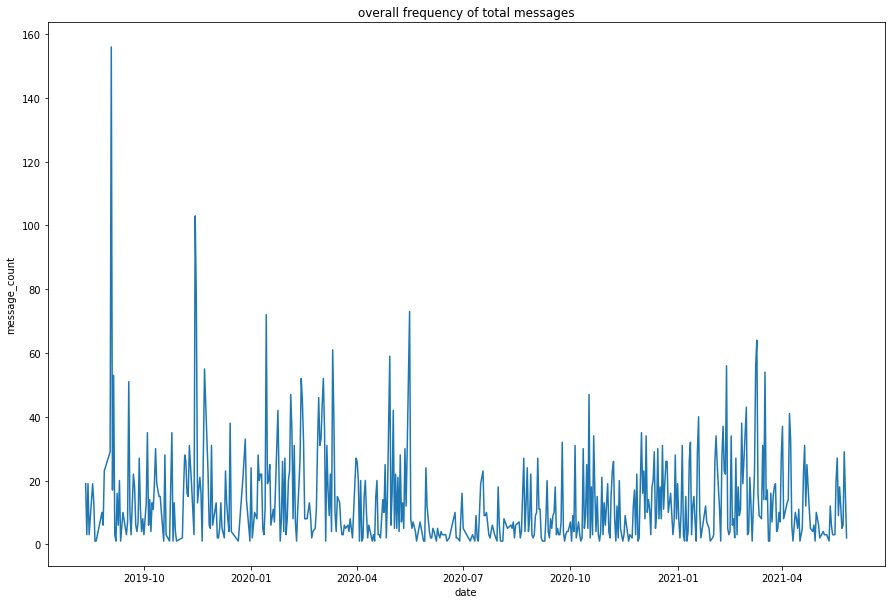

In [10]:
plt.figure(figsize=(15,10))
plt.title('overall frequency of total messages')
sns.lineplot(new_df.date, new_df.message_count)

## Top 10 most active days of messaging

In [11]:
top10days = new_df.sort_values(by='message_count', ascending=False).head(10)
top10days.reset_index(inplace=True)
top10days.drop('index',inplace=True, axis=1)
top10days

,date,message_count
0,2019-09-03,156
1,2019-11-14,103
2,2019-11-15,76
3,2020-05-16,73
4,2020-01-14,72
5,2021-03-10,64
6,2020-03-11,61
7,2020-04-29,59
8,2021-02-12,56
9,2021-03-09,56


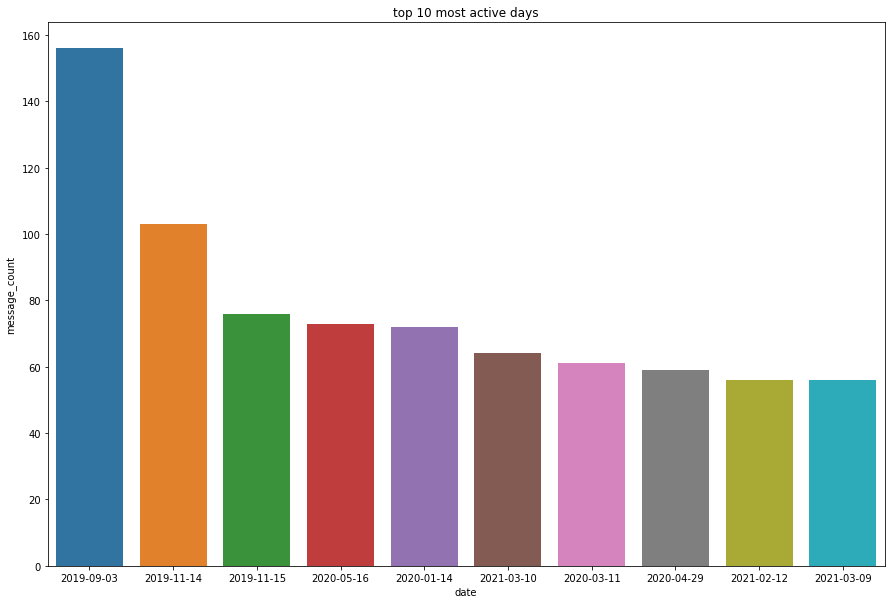

In [12]:
plt.figure(figsize=(15,10))
plt.title('top 10 most active days')
sns.barplot(top10days.date, top10days.message_count)

## Top 10 active users in the group

In [13]:
df2 = df.copy()
df2 = df2[df2.user != 'group_notification']
top10users = df2.groupby('user')['message'].count().sort_values(ascending=False).head(10)
top10users = top10users.reset_index()
top10users

,user,message
0,IPL Sai Sunder,1084
1,Guru,903
2,Koustav,380
3,Juhi,307
4,Meera,223
5,Pallavi,222
6,IPL2,220
7,Dhanashree,215
8,+91 88844 46840,190
9,Ipsita,184


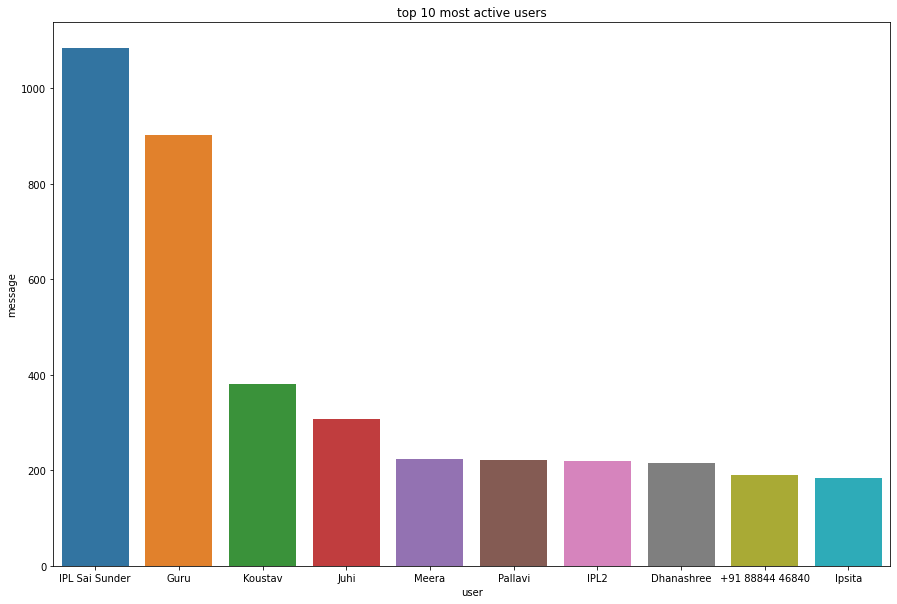

In [14]:
plt.figure(figsize=(15,10))
plt.title('top 10 most active users')
sns.barplot(top10users.user, top10users.message)

## inactive members in the group

In [15]:
df2 = df.copy()
df2 = df2[df2.user != 'group_notification']
last10users = df2.groupby('user')['message'].count().sort_values(ascending=True).head(10)
last10users = last10users.reset_index()
last10users

,user,message
0,+91 95911 84093,1
1,Rahul IPL,1
2,+91 98230 10005,1
3,+91 79880 12812,2
4,+91 99456 10428,3
5,+91 99594 20006,3
6,Sejal,3
7,+91 84319 67270,4
8,+91 96118 23086,10
9,Sonali Ma'am,11


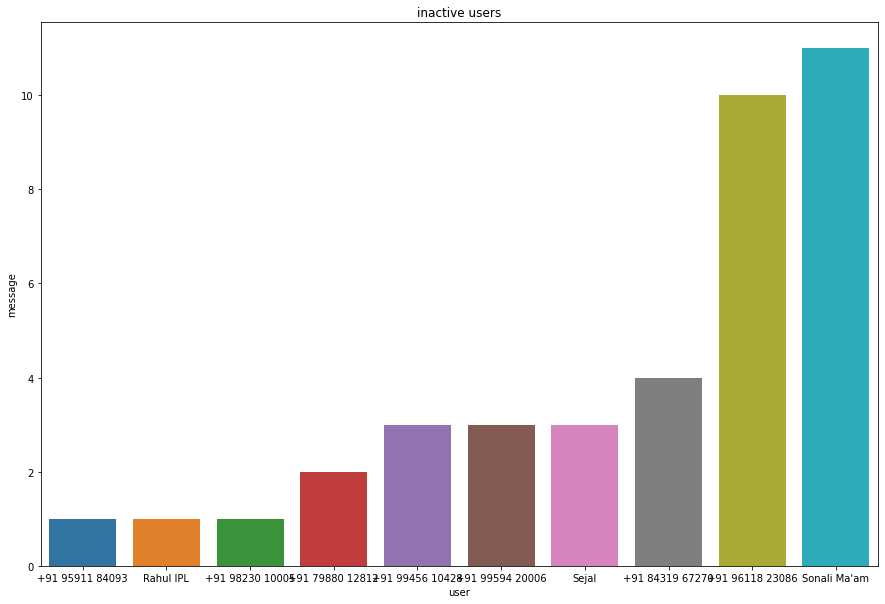

In [16]:
plt.figure(figsize=(15,10))
plt.title('inactive users')
sns.barplot(last10users.user, last10users.message)

## most active hours

In [17]:
df3 = df.copy()
df3['message_count'] = [1]*df.shape[0]
df3['hours'] = df3['date_time'].apply(lambda x: x.hour)
grouped_by_time = df3.groupby('hours').sum().sort_values(by='message_count', ascending=False).reset_index().head(10)
grouped_by_time

,hours,year,message_count
0,17,1547547,766
1,13,1415937,701
2,10,1311113,649
3,16,1218084,603
4,14,1191743,590
5,12,1153381,571
6,18,1127329,558
7,11,977680,484
8,9,854461,423
9,15,824167,408


In [18]:
grouped_by_time.drop('year', axis=1, inplace=True)

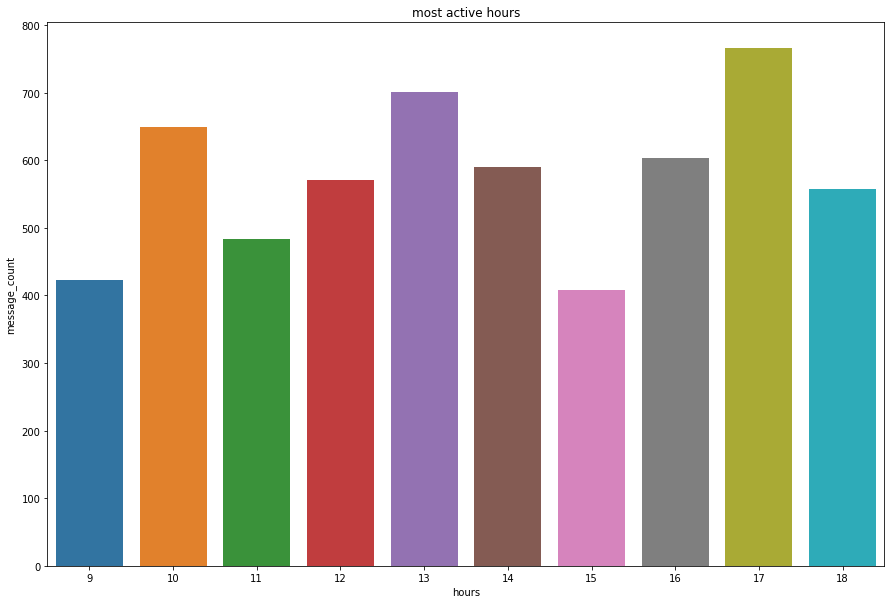

In [19]:
plt.figure(figsize=(15,10))
plt.title('most active hours')
sns.barplot(grouped_by_time.hours, grouped_by_time.message_count)

## most active days

In [20]:
grouped_by_days = df3.groupby('day').sum().reset_index()[['day', 'message_count']]
grouped_by_days

,day,message_count
0,Fri,1231
1,Mon,991
2,Sat,935
3,Sun,407
4,Thu,1264
5,Tue,1354
6,Wed,1202


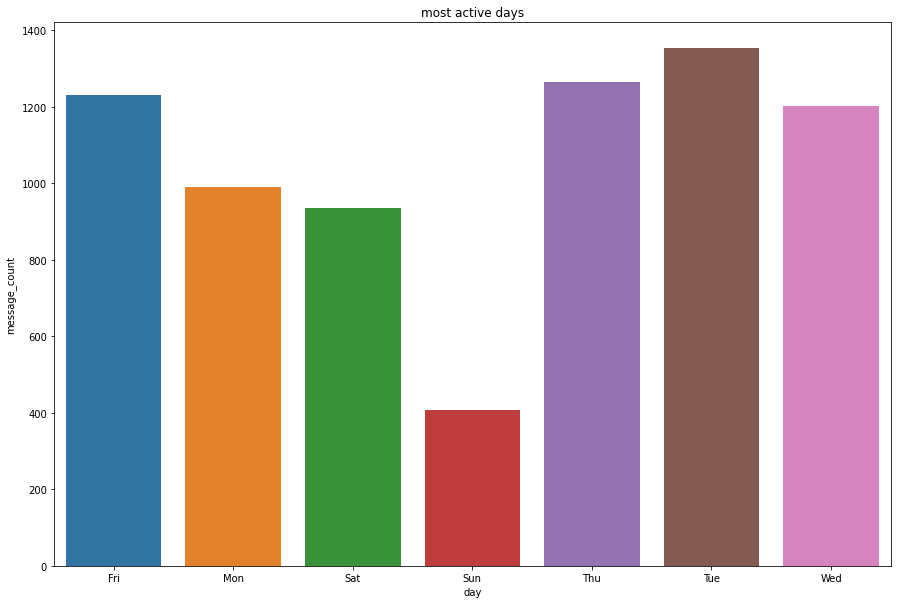

In [21]:
plt.figure(figsize=(15,10))
plt.title('most active days')
sns.barplot(grouped_by_days.day, grouped_by_days.message_count)
plt.show()

## most active months

In [22]:
grouped_by_months = df3.groupby('month').sum().reset_index()[['month', 'message_count']]
grouped_by_months

,month,message_count
0,Apr,648
1,Aug,288
2,Dec,690
3,Feb,1012
4,Jan,793
5,Jul,127
6,Jun,72
7,Mar,988
8,May,631
9,Nov,774


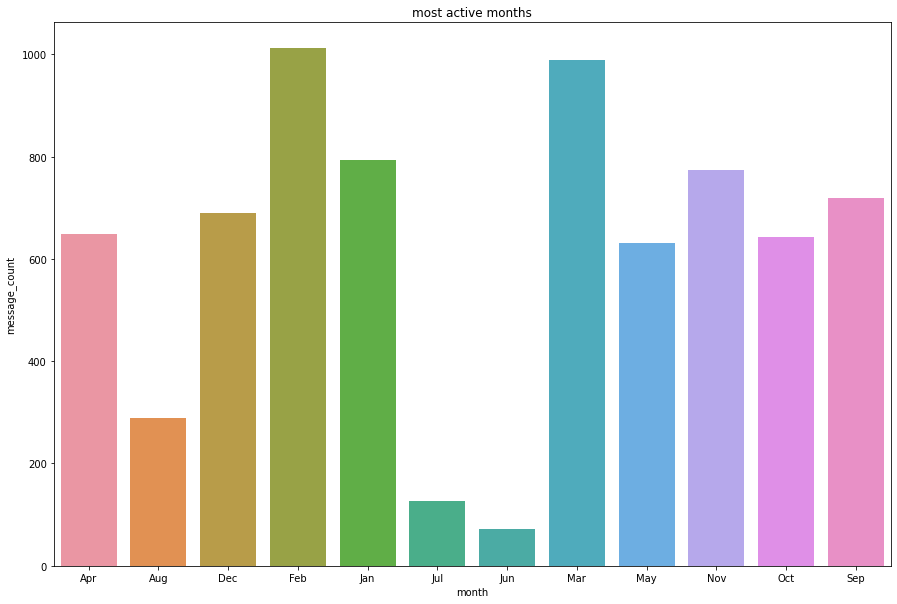

In [23]:
plt.figure(figsize=(15,10))
plt.title('most active months')
sns.barplot(grouped_by_months.month, grouped_by_months.message_count)
plt.show()

## wordcloud for frequency of messages

In [24]:
df3.message

0       Messages and calls are end-to-end encrypted. N...
1       Vinay IPL created group "MIT - MBA FT Academics" 
2                                    Vinay IPL added you 
3       Vinay IPL added Sejal, +91 97380 42112 and +91...
4                                Any introduction here?? 
                              ...                        
7379                    Congratulations @919503089525 👏👏 
7380                             Congratulations kalyani 
7381                              Thank you everyone ☺️🥳 
7382    https://www.linkedin.com/jobs/view/2555161007 ...
7383    https://docs.google.com/forms/d/e/1FAIpQLSeNAr...
Name: message, Length: 7384, dtype: object

In [25]:
comment_words = ''

for val in df3.message.values:
  val = str(val)

  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  for words in tokens:
    comment_words += str(words) + ''

wordcloud = WordCloud(width=1000, height=800, background_color='white', min_font_size=8).generate(comment_words)

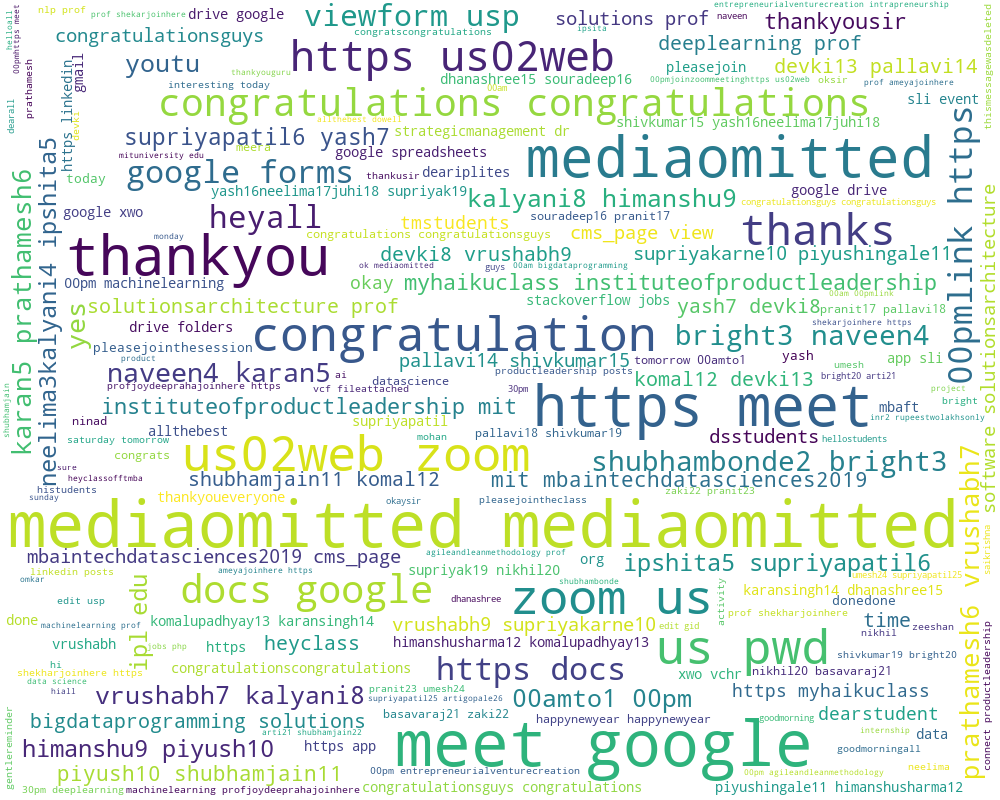

In [26]:
wordcloud.to_image()